This notebook uses a number of clustering algorithms to cluster the census tracts in Suffolk County, MA.

In [13]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
plt.style.use('seaborn')
cmap = 'tab10'

## Non-heirarchical

In [65]:
# use only sample count variables
df = pd.read_csv('CSV_files/samplecount_final.csv',index_col=0)

In [66]:
df.set_index('tractid',inplace=True)

In [67]:
df.columns[132:]

Index(['ITANC00_POC', 'GEANC00_POC', 'IRANC00_POC', 'SCANC00_POC',
       'RUFB00_POC', 'ITFB00_POC', 'GEFB00_POC', 'IRFB00_POC', 'SCFB00_POC',
       'FB00_POC', 'NAT00_POC', 'N10IMM00_POC', 'AG5UP00_POC', 'OLANG00_POC',
       'LEP00_POC', 'AG25UP00_POC', 'HS00_POC', 'COL00_POC', 'AG15UP00_POC',
       'Mar-00_POC', 'WDS00_POC', 'CLF00_POC', 'UNEMP00_POC', 'DFLABF00_POC',
       'FLABF00_POC', 'EMPCLF00_POC', 'PROF00_POC', 'MANUF00_POC',
       'SEMP00_POC', 'AG18CV00_POC', 'VET00_POC', 'DPOV00_POC', 'NPOV00_POC',
       'N65POV00_POC', 'DFMPOV00_POC', 'NFMPOV00_POC', 'DWPOV00_POC',
       'NWPOV00_POC', 'DBPOV00_POC', 'NBPOV00_POC', 'DNAPOV00_POC',
       'NNAPOV00_POC', 'DHPOV00_POC', 'NHPOV00_POC', 'DAPOV00_POC',
       'NAPOV00_POC', 'INCPC00_POC', 'HU00SP_POC', 'H30OLD00_POC',
       'OHU00SP_POC', 'H10YRS00_POC', 'DMULTI00_POC', 'MULTI00_POC',
       'HINC00_POC', 'HINCW00_POC', 'HINCB00_POC', 'HINCH00_POC',
       'HINCA00_POC', 'MHMVAL00_POC', 'MRENT00_POC', 'HH00_POC', 'HHW0

In [68]:
# get rid of the data from 2010 
df1 = df.iloc[:,0:66]

In [69]:
df1.head()

,RUANC00,ITANC00,GEANC00,IRANC00,SCANC00,RUFB00,ITFB00,GEFB00,IRFB00,SCFB00,...,HINCB00,HINCH00,HINCA00,MHMVAL00,MRENT00,HH00,HHW00,HHB00,HHH00,HHA00
tractid,,,,,,,,,,,,,,,,,,,,,
25025000100,99.000000,528.000000,94.000000,636.000000,34.000000,24.000000,42.000000,7.0,55.000000,0.0,...,45000.0,57833.0000,63500.00000,222100.0000,898.000000,1562.000000,1227.000000,56.000000,108.000000,107.000000
25025000201,82.000000,272.000000,83.000000,967.000000,40.000000,12.000000,21.000000,14.0,219.000000,7.0,...,50568.0,45455.0000,71250.00000,265600.0000,991.000000,1550.000000,1313.000000,27.000000,80.000000,86.000000
25025000202,43.000000,246.000000,140.000000,1247.000000,31.000000,0.000000,10.000000,0.0,376.000000,0.0,...,90027.0,28417.0000,53548.38710,276700.0000,820.000000,1494.000000,1140.000000,55.000000,105.000000,146.000000
25025000301,91.000000,303.000000,111.000000,746.000000,16.000000,67.000000,69.000000,0.0,175.000000,11.0,...,31250.0,6250.0000,49166.66667,214400.0000,971.000000,1159.000000,983.000000,22.000000,30.000000,78.000000
25025000302,208.096787,348.441132,95.821312,718.175903,39.683575,83.238716,26.133085,0.0,157.766403,0.0,...,51250.0,108970.0021,54264.70435,259499.9961,1240.999993,1266.002808,1085.974854,15.486273,43.555141,105.500236


In [70]:
df2 = df.iloc[:,132:]

In [80]:
df_final = df1.merge(df2,how='outer',left_index=True,right_index=True)

In [81]:
df_final.shape

(193, 132)

In [85]:
### Scale the data
scaler=StandardScaler()
scaled_data = scaler.fit_transform(df_final.values)


In [86]:
df_scaled = pd.DataFrame(scaled_data,index=df_final.index,columns=df_final.columns)

In [87]:
df_scaled.head()

,RUANC00,ITANC00,GEANC00,IRANC00,SCANC00,RUFB00,ITFB00,GEFB00,IRFB00,SCFB00,...,HINCH00_POC,HINCA00_POC,MHMVAL00_POC,MRENT00_POC,HH00_POC,HHW00_POC,HHB00_POC,HHH00_POC,HHA00_POC,RUANC00_POC
tractid,,,,,,,,,,,,,,,,,,,,,
25025000100,0.527125,0.410888,0.186843,0.383932,0.172367,0.165125,0.262211,-0.145600,0.531807,-0.377409,...,-0.363696,-0.286005,-0.269537,-0.058318,-0.362229,-0.176203,-0.528875,-0.190804,-0.473682,-0.072340
25025000201,0.305138,-0.129928,0.051711,1.108247,0.378216,-0.095802,-0.121525,0.390690,3.559758,0.441236,...,-0.096449,-0.383914,0.287201,-0.265426,-0.763760,-0.362495,0.338636,0.393717,-0.420351,-0.072385
25025000202,-0.204125,-0.184855,0.751939,1.720960,0.069443,-0.356728,-0.322529,-0.681891,6.458467,-0.377409,...,-0.211559,-0.603855,-0.274158,0.147992,-0.627085,-0.360727,-0.090361,0.071430,-0.478285,-0.072210
25025000301,0.422661,-0.064438,0.395683,0.624641,-0.445179,1.100111,0.755586,-0.681891,2.747381,0.909033,...,6.260969,0.247011,0.169396,-0.029099,-0.543584,-0.238231,0.042413,-0.125365,-0.525822,-0.072360
25025000302,1.951716,0.031559,0.209217,0.563754,0.367360,1.453204,-0.027727,-0.681891,2.429195,-0.377409,...,-0.704278,-0.341726,-0.686714,-0.913006,-0.333716,-0.249277,2.053037,-0.805079,-0.554248,-0.072308


# Non-heirarchical

## K-means

In [98]:
model = KMeans(n_clusters=8).fit(df_scaled)

In [99]:
model.cluster_centers_

array([[ 0.03017263,  1.7068411 ,  0.11852088, ...,  0.65991235,
        -0.01941168, -0.07220536],
       [-0.57957331, -0.49587473, -0.72824844, ..., -0.07551149,
         0.41961137,  0.19598624],
       [-0.10183055, -0.16593221, -0.3131523 , ..., -0.20958532,
         0.4005205 , -0.07232673],
       ...,
       [ 0.10881052, -0.03922645,  0.30079732, ..., -0.20571749,
        -0.25697072, -0.07227972],
       [-0.4589422 , -0.4261711 , -0.4565412 , ...,  2.52489284,
        -0.38507355, -0.07213389],
       [ 1.71541918,  0.05049334,  2.13003423, ..., -0.21261893,
        -0.43079182, -0.07230806]])

### Finding optimal K

In [ ]:
## elbow method

In [ ]:
# Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k, 
# and choose the k for which WSS first starts to diminish. In the plot of WSS-versus-k, 
# this is visible as an elbow.

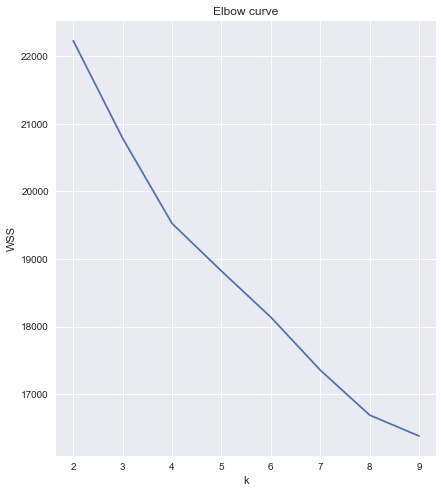

In [97]:
# Specifying the dataset and initializing variables
X = df_scaled
distorsions = []

# Calculate SSE for different K
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state = 301)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

# Plot values of SSE
plt.figure(figsize=(15,8))
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.ylabel('WSS')
plt.plot(range(2, 10), distorsions)
plt.grid(True)


In [ ]:
## silhouette coeff

In [ ]:
# how similar is a point to its own cluster compared to other clusters
# b/w -1 and 1 
# high value is better
# reaches its global maximum at the optimal k

In [95]:
X = df_scaled
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)

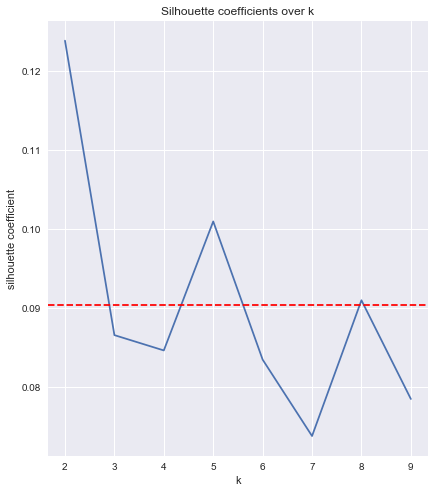

In [96]:
# Plot Silhouette coefficient
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

# Heirarchical

In [100]:
### Agglomerative Heirarchical